# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to HTML, all the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.

---
### Why We're Here

Photo sharing and photo storage services like to have location data for each photo that is uploaded. With the location data, these services can build advanced features, such as automatic suggestion of relevant tags or automatic photo organization, which help provide a compelling user experience. Although a photo's location can often be obtained by looking at the photo's metadata, many photos uploaded to these services will not have location metadata available. This can happen when, for example, the camera capturing the picture does not have GPS or if a photo's metadata is scrubbed due to privacy concerns.

If no location metadata for an image is available, one way to infer the location is to detect and classify a discernable landmark in the image. Given the large number of landmarks across the world and the immense volume of images that are uploaded to photo sharing services, using human judgement to classify these landmarks would not be feasible.

In this notebook, you will take the first steps towards addressing this problem by building models to automatically predict the location of the image based on any landmarks depicted in the image. At the end of this project, your code will accept any user-supplied image as input and suggest the top k most relevant landmarks from 50 possible landmarks from across the world. The image below displays a potential sample output of your finished project.

![Sample landmark classification output](images/sample_landmark_output.png)


### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Download Datasets and Install Python Modules
* [Step 1](#step1): Create a CNN to Classify Landmarks (from Scratch)
* [Step 2](#step2): Create a CNN to Classify Landmarks (using Transfer Learning)
* [Step 3](#step3): Write Your Landmark Prediction Algorithm

---
<a id='step0'></a>
## Step 0: Download Datasets and Install Python Modules

**Note: if you are using the Udacity workspace, *YOU CAN SKIP THIS STEP*. The dataset can be found in the `/data` folder and all required Python modules have been installed in the workspace.**

Download the [landmark dataset](https://udacity-dlnfd.s3-us-west-1.amazonaws.com/datasets/landmark_images.zip).
Unzip the folder and place it in this project's home directory, at the location `/landmark_images`.

Install the following Python modules:
* cv2
* matplotlib
* numpy
* PIL
* torch
* torchvision

---

<a id='step1'></a>
## Step 1: Create a CNN to Classify Landmarks (from Scratch)

In this step, you will create a CNN that classifies landmarks.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 20%.

Although 20% may seem low at first glance, it seems more reasonable after realizing how difficult of a problem this is. Many times, an image that is taken at a landmark captures a fairly mundane image of an animal or plant, like in the following picture.

<img src="images/train/00.Haleakala_National_Park/084c2aa50d0a9249.jpg" alt="Bird in Haleakalā National Park" style="width: 400px;"/>

Just by looking at that image alone, would you have been able to guess that it was taken at the Haleakalā National Park in Hawaii?

An accuracy of 20% is significantly better than random guessing, which would provide an accuracy of just 2%. In Step 2 of this notebook, you will have the opportunity to greatly improve accuracy by using transfer learning to create a CNN.

Remember that practice is far ahead of theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

**Note**: Remember that the dataset can be found at `/data/landmark_images/` in the workspace.

All three of your data loaders should be accessible via a dictionary named `loaders_scratch`. Your train data loader should be at `loaders_scratch['train']`, your validation data loader should be at `loaders_scratch['valid']`, and your test data loader should be at `loaders_scratch['test']`.

You may find [this documentation on custom datasets](https://pytorch.org/docs/stable/torchvision/datasets.html#datasetfolder) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [9]:
!pip install --upgrade --user torch==1.9.0+cu102 torchvision==0.10.0+cu102 torchaudio===0.9.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


    36% |███████████▌                    | 299.6MB 71.5MB/s eta 0:00:08

    37% |████████████                    | 312.3MB 29.4MB/s eta 0:00:18

    37% |████████████                    | 313.8MB 65.9MB/s eta 0:00:08

    39% |████████████▉                   | 332.6MB 15.0MB/s eta 0:00:34

    40% |█████████████                   | 337.7MB 33.5MB/s eta 0:00:15

    42% |███████████�

    43% |██████████████                  | 362.5MB 46.0MB/

    43% |██████████████                  | 364.4MB 32.2MB/

    44% |�

    45% |██████████████▍                 | 374.2MB 41.4MB/s eta 0:00:12

    45% |█████�

    82% |██████████████████████████▍     | 686.9MB 32.8MB/s eta 0:00:05              | 390.9MB 71.9MB/s eta 0:00:07    47% |███████████████▏                | 393.0MB 34.9MB/s eta 0:00:13                | 394.8MB 74.4MB/s eta 0:00:06.9MB 77.5MB/s eta 0:00:06    | 398.8MB 29.0MB/s eta 0:00:1506eta 0:00:12�████▋                | 405.2MB 81.1MB/s eta 0:00:06�███████▊                | 407.1MB 21.3MB/s eta 0:00:20�██████████▊                | 409.0MB 30.2MB/s eta 0:00:14�█████████████▉                | 410.9MB 22.2MB/s eta 0:00:19    49% |████████████████                | 413.3MB 81.1MB/s eta 0:00:06s eta 0:00:19B 77.7MB/s eta 0:00:06█████████▏               | 419.2MB 75.9MB/s eta 0:00:06B 42.0MB/s eta 0:00:10    50% |████████████████▎               | 423.4MB 75.0MB/s eta 0:00:06███▍               | 425.2MB 34.7MB/s eta 0:00:12            | 426.9MB 22.2MB/s eta 0:00:19 |████████████████▌               | 428.8MB 19.2MB/s eta 0:00:22��███████████▋               | 430.5MB 21.6MB/s eta 0:00:19�█

    82% |██████████████████████�

    100% |████████████████████████████████| 831.4MB 17kB/s  eta 0:00:01�█████▋     | 690.9MB 81.2MB/s eta 0:00:02�█████████████████████████▋     | 692.3MB 27.7MB/s eta 0:00:06�█████████████████████████▊     | 693.7MB 20.8MB/s eta 0:00:07��███████████████████████▊     | 695.3MB 66.8MB/s eta 0:00:03��██████████████████▉     | 696.9MB 36.0MB/s eta 0:00:0446.8MB/s eta 0:00:03████████████     | 699.4MB 79.8MB/s eta 0:00:02    84% |███████████████████████████     | 703.2MB 79.3MB/s eta 0:00:02 |███████████████████████████     | 704.2MB 28.0MB/s eta 0:00:05��████▏    | 705.6MB 31.6MB/s eta 0:00:04��██████████████████▏    | 707.2MB 82.8MB/s eta 0:00:02��█▎    | 708.1MB 28.4MB/s eta 0:00:05�████████████████▎    | 709.6MB 63.2MB/s eta 0:00:02██████████▍    | 710.8MB 81.4MB/s eta 0:00:02█████████████████████████▍    | 711.9MB 19.9MB/s eta 0:00:06�███████▌    | 713.3MB 76.3MB/s eta 0:00:02█████████████████████████▌    | 714.2MB 85.9MB/s eta 0:00:02��████▌    | 715.7MB 34.7MB/s eta 0:00:04.0MB 39.3

In [10]:
!pip install --upgrade --user pip setuptools wheel

    100% |████████████████████████████████| 1.6MB 10.3MB/s ta 0:00:01    50% |████████████████▎               | 788kB 11.1MB/s eta 0:00:01
    100% |████████████████████████████████| 829kB 13.2MB/s ta 0:00:01    34% |███████████▏                    | 286kB 18.8MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  The script wheel is installed in '/root/.local/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [11]:
!pip install --upgrade --user albumentations

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 98 kB 4.0 MB/s eta 0:00:011
     |████████████████████████████████| 12.4 MB 8.5 MB/s eta 0:00:01    |█████                           | 1.9 MB 8.5 MB/s eta 0:00:02     |████████████████▊               | 6.5 MB 8.5 MB/s eta 0:00:01
     |████████████████████████████████| 38.2 MB 24.8 MB/s eta 0:00:01    |██                              | 2.4 MB 25.0 MB/s eta 0:00:02     |███████████████▌                | 18.5 MB 25.0 MB/s eta 0:00:01     |███████████████████████▏        | 27.7 MB 24.8 MB/s eta 0:00:01     |███████████████████████████▊    | 33.1 MB 24.8 MB/s eta 0:00:01
     |████████████████████████████████| 14.8 MB 20.0 MB/s eta 0:00:01    |██                              | 972 kB 20.0 MB/s eta 0:00:01     |███████████████▊                | 7.3 MB 20.0 MB/s eta 0:00

In [12]:
!pip install --upgrade --user matplotlib==2.0.2

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 14.6 MB 4.3 MB/s eta 0:00:01


In [13]:
!pip install --upgrade --user tqdm

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 75 kB 2.8 MB/s eta 0:00:011
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
moviepy 0.2.3.2 requires decorator==4.0.11, but you have decorator 4.4.2 which is incompatible.
moviepy 0.2.3.2 requires imageio==2.1.2, but you have imageio 2.9.0 which is incompatible.
moviepy 0.2.3.2 requires tqdm==4.11.2, but you have tqdm 4.61.1 which is incompatible.


In [1]:
import numpy as np
from glob import glob
import cv2
import matplotlib
import matplotlib.pyplot as plt                        
%matplotlib inline
from tqdm import tqdm
import torch
import torchvision.models as models
from PIL import Image
import torchvision.transforms as transforms
import os
from torchvision import datasets
import torch.nn as nn
import torch.nn.functional as F
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import random
import torch.optim as optim
import math
from torch.utils.data import Dataset

In [2]:
print(torch.__version__)

1.9.0+cu102


In [3]:
matplotlib.__version__

'2.0.2'

In [20]:
class DatasetFromSubset(Dataset):
    def __init__(self, subset, transform=None):
        self.subset = subset
        self.transform = transform

    def __getitem__(self, index):
        x, y = self.subset[index]
        if self.transform:
            x = self.transform(x)
        return x, y

    def __len__(self):
        return len(self.subset)

In [21]:
num_workers = 0
batch_size = 64
data_dir = '/data/landmark_images'

mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
jitter = 0.05
image_size = 256
random_rotation = (-15, 15)
random_translate = (0, 0.1)
random_scale = (1.0, 1.25)
random_shear = (-10, 10)

In [24]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

image_normalizer = transforms.Normalize(mean,std)
brightness_jitter = transforms.ColorJitter(brightness=jitter)
contrast_jitter = transforms.ColorJitter(contrast=jitter)
saturation_jitter = transforms.ColorJitter(saturation=jitter)
hue_jitter = transforms.ColorJitter(hue=jitter)

image_transforms = {
    'train':  transforms.Compose([
        transforms.RandomResizedCrop(image_size),
        transforms.RandomAffine(degrees=random_rotation, translate=random_translate, scale=random_scale, shear=random_shear),
        transforms.RandomHorizontalFlip(p=0.1),
        transforms.RandomVerticalFlip(p=0.1),
        brightness_jitter,
        contrast_jitter,
        saturation_jitter,
        hue_jitter,
        transforms.RandomGrayscale(p=0.1),
        transforms.ToTensor(),
        image_normalizer
    ]),
    'valid':  transforms.Compose([
        transforms.CenterCrop((image_size, image_size)),
        transforms.ToTensor(),
        image_normalizer
    ]),
    'test':  transforms.Compose([
        transforms.CenterCrop((image_size, image_size)),
        transforms.ToTensor(),
        image_normalizer
    ])
}

dataset = datasets.ImageFolder(data_dir + '/train')

train_split, valid_split,  = torch.utils.data.random_split(dataset, [len(dataset)-1250, 1250])


train_dataset = DatasetFromSubset(train_split, transform=image_transforms["train"])
valid_dataset = DatasetFromSubset(valid_split, transform=image_transforms["valid"])
test_dataset = datasets.ImageFolder(data_dir + '/test', transform=image_transforms["test"])


trainLoader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
validLoader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
testLoader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

loaders_scratch = {
    'train': trainLoader,
    'valid': validLoader,
    'test': testLoader
}


In [43]:
print('Size of Training dataset:{}\nSize of Validation dataset:{}\nSize of Testing dataset:{}\n'.format(len(train_dataset), len(valid_dataset), len(test_dataset)))

Size of Training dataset:3746
Size of Validation dataset:1250
Size of Testing dataset:1250



**Question 1:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

**Answer**: 

I started with 224x224 images, but after trial and error I moved to 256x256 images.

Yes, I augmented the dataset to make the classifier better at generalizations. the augmetations I used were: Random Resized Crop, horizontal flips, vertical flips, random rotation, random translate, random scale, random_shear, brightness jitter, contrast jitter, saturation jitter, hue jitter, and random greyscale.

### (IMPLEMENTATION) Visualize a Batch of Training Data

Use the code cell below to retrieve a batch of images from your train data loader, display at least 5 images simultaneously, and label each displayed image with its class name (e.g., "Golden Gate Bridge").

Visualizing the output of your data loader is a great way to ensure that your data loading and preprocessing are working as expected.

In [28]:
def remove_normalisation(image):
    return image * std[:, None, None] + mean[:, None, None]

In [31]:
## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)

## TODO: visualize a batch of the train data loader
def show_random_image(rows, cols):
    fig = plt.figure(figsize=(20, rows*6))
    
    for i in range(1, rows * cols + 1):
        
        random_image = random.randint(0, len(train_dataset))
        fig.add_subplot(rows, cols, i)
        img = remove_normalisation(train_dataset[random_image][0])
        plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))
        plt.title('Training example #{}\n True label: {}'.format(random_image, dataset.classes[train_dataset[random_image][1]]))
        plt.axis('off')
    
    plt.show()


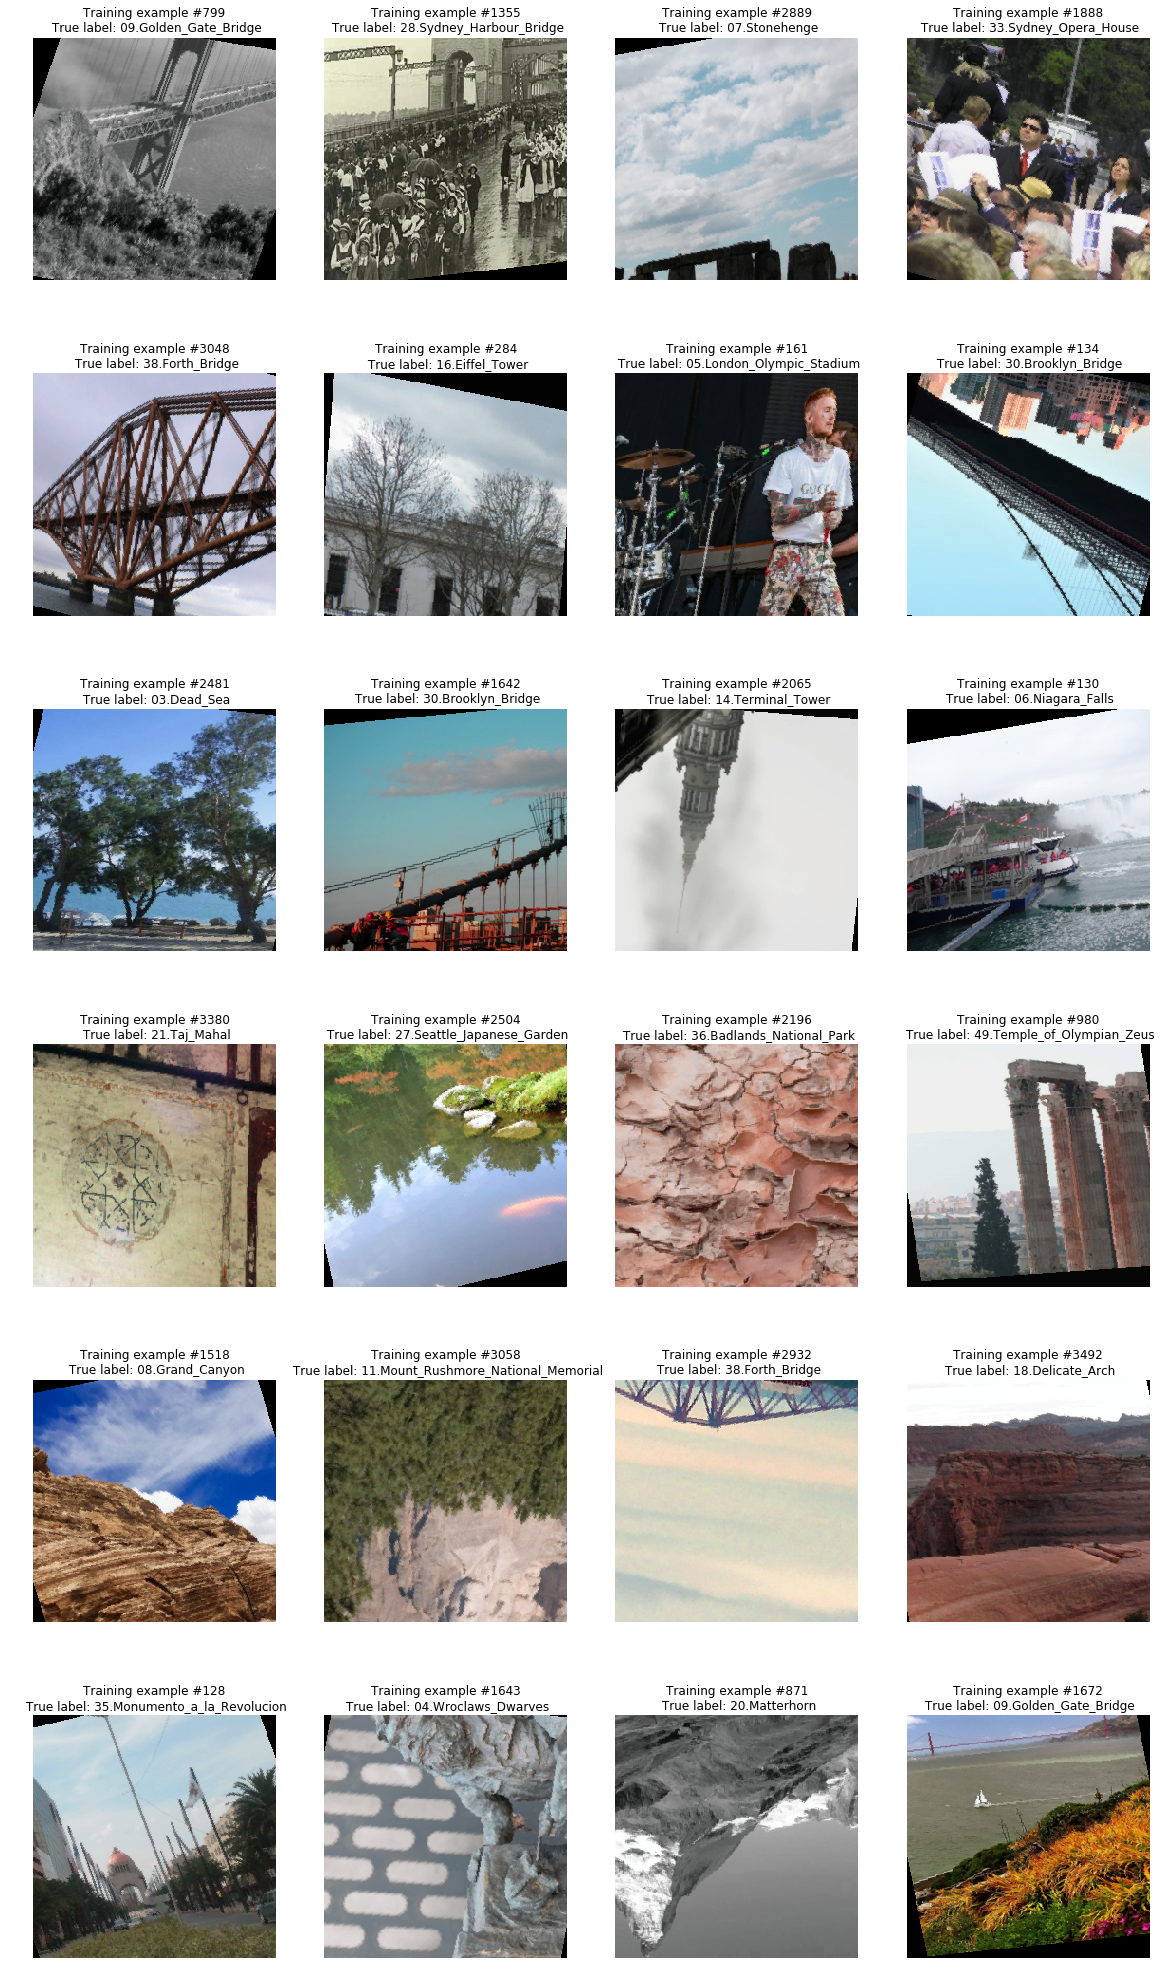

In [32]:
show_random_image(6,4)

In [33]:
print('\n'.join(dataset.classes))

00.Haleakala_National_Park
01.Mount_Rainier_National_Park
02.Ljubljana_Castle
03.Dead_Sea
04.Wroclaws_Dwarves
05.London_Olympic_Stadium
06.Niagara_Falls
07.Stonehenge
08.Grand_Canyon
09.Golden_Gate_Bridge
10.Edinburgh_Castle
11.Mount_Rushmore_National_Memorial
12.Kantanagar_Temple
13.Yellowstone_National_Park
14.Terminal_Tower
15.Central_Park
16.Eiffel_Tower
17.Changdeokgung
18.Delicate_Arch
19.Vienna_City_Hall
20.Matterhorn
21.Taj_Mahal
22.Moscow_Raceway
23.Externsteine
24.Soreq_Cave
25.Banff_National_Park
26.Pont_du_Gard
27.Seattle_Japanese_Garden
28.Sydney_Harbour_Bridge
29.Petronas_Towers
30.Brooklyn_Bridge
31.Washington_Monument
32.Hanging_Temple
33.Sydney_Opera_House
34.Great_Barrier_Reef
35.Monumento_a_la_Revolucion
36.Badlands_National_Park
37.Atomium
38.Forth_Bridge
39.Gateway_of_India
40.Stockholm_City_Hall
41.Machu_Picchu
42.Death_Valley_National_Park
43.Gullfoss_Falls
44.Trevi_Fountain
45.Temple_of_Heaven
46.Great_Wall_of_China
47.Prague_Astronomical_Clock
48.Whitby_Abbey
4

In [34]:
print(len(dataset.classes))

50


### Initialize use_cuda variable

In [35]:
# useful variable that tells us whether we should use the GPU
use_cuda = torch.cuda.is_available()

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and fill in the function `get_optimizer_scratch` below.

In [41]:
## TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

def get_optimizer_scratch(model):
    ## TODO: select and return an optimizer
#     return optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    return optim.Adam(model.parameters(), lr=0.001)
    

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify images of landmarks.  Use the template in the code cell below.

In [37]:
import torch.nn as nn

# define the CNN architecture
class Net(nn.Module):
    ## TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        
        num_filters = 16
        num_layers = 0
        
        self.conv1 = nn.Conv2d(3, num_filters*2**num_layers, 3, padding=1)
        num_layers += 1
        self.conv2 = nn.Conv2d(num_filters*2**(num_layers-1), num_filters*2**num_layers, 3, padding=1)
        num_layers += 1
        self.conv3 = nn.Conv2d(num_filters*2**(num_layers-1), num_filters*2**num_layers, 3, padding=1)
        num_layers += 1
#         self.conv4 = nn.Conv2d(num_filters*2**(num_layers-1), num_filters*2**num_layers, 3, padding=1)
#         num_layers += 1
        
        self.pool = nn.MaxPool2d(2, 2)
        
        self.num_pixels = int((num_filters*4*image_size*image_size)/(4**num_layers))
        self.num_layers = num_layers
        
        num_layers += 1
        self.fc1 = nn.Linear(self.num_pixels, num_filters*2**num_layers)
        num_layers -= 1
        self.fc2 = nn.Linear(num_filters*2**(num_layers+1), num_filters*2**num_layers)
        num_layers -= 1
#         self.fc3 = nn.Linear(num_filters*2**(num_layers+1), num_filters*2**num_layers)
#         num_layers -= 1
        self.fc4 = nn.Linear(num_filters*2**(num_layers+1), 50) 
        
        self.dropout = nn.Dropout(0.4)
    
    def forward(self, x):
        ## Define forward behavior
        
        x = self.pool(F.leaky_relu(self.conv1(x), negative_slope=0.2))
        x = self.pool(F.leaky_relu(self.conv2(x), negative_slope=0.2))
        x = self.pool(F.leaky_relu(self.conv3(x), negative_slope=0.2))
#         x = self.pool(F.leaky_relu(self.conv4(x), negative_slope=0.2))
        
        x = x.view(-1, self.num_pixels)
        
        x = self.dropout(x)
        x = F.leaky_relu(self.fc1(x), negative_slope=0.2)
        
        x = self.dropout(x)
        x = F.leaky_relu(self.fc2(x), negative_slope=0.2)
        
#         x = self.dropout(x)
#         x = F.leaky_relu(self.fc3(x), negative_slope=0.2)

        x = self.dropout(x)
        x = self.fc4(x)
        
        return x

#-#-# Do NOT modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [38]:
print(model_scratch)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=65536, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=50, bias=True)
  (dropout): Dropout(p=0.4, inplace=False)
)


__Question 2:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

I started with a classifier architecture that was present in the original VGG-16 paper as I would have liked to compare my produced model to it, but quickly found out that the dataset provided would not be enough for it to train fully; thus, through trail and error I reduced the number of convolutional layers from 5 to 3 and the cut the number of nodes to accommodate the provided dataset.

### (IMPLEMENTATION) Implement the Training Algorithm

Implement your training algorithm in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at the filepath stored in the variable `save_path`.

In [39]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        # set the module to training mode
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## TODO: find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))

            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            

        ######################    
        # validate the model #
        ######################
        # set the model to evaluation mode
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## TODO: update average validation loss 

            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
            

        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))

        ## TODO: if the validation loss has decreased, save the model at the filepath stored in save_path
        
        if valid_loss < valid_loss_min:
            print("Model with validation {:.5f} saved".format(valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
        
        
    return model

### (IMPLEMENTATION) Experiment with the Weight Initialization

Use the code cell below to define a custom weight initialization, and then train with your weight initialization for a few epochs. Make sure that neither the training loss nor validation loss is `nan`.

Later on, you will be able to see how this compares to training with PyTorch's default weight initialization.

In [42]:
def custom_weight_init(m):
    ## TODO: implement a weight initialization strategy
    if isinstance(m, nn.Conv2d):
        n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
        m.weight.data.normal_(0, math.sqrt(2. / n))
        if m.bias is not None:
            m.bias.data.zero_()
    elif isinstance(m, nn.BatchNorm2d):
        m.weight.data.fill_(1)
        m.bias.data.zero_()
    elif isinstance(m, nn.Linear):
        m.weight.data.normal_(0, 0.01)
        m.bias.data.zero_()
    
#-#-# Do NOT modify the code below this line. #-#-#
model_scratch.apply(custom_weight_init)
model_scratch = train(20, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch), criterion_scratch, use_cuda, 'ignore.pt')

Epoch: 1 	Training Loss: 3.851530 	Validation Loss: 3.756387
Model with validation 3.75639 saved
Epoch: 2 	Training Loss: 3.734344 	Validation Loss: 3.670684
Model with validation 3.67068 saved
Epoch: 3 	Training Loss: 3.654332 	Validation Loss: 3.597156
Model with validation 3.59716 saved
Epoch: 4 	Training Loss: 3.602610 	Validation Loss: 3.549102
Model with validation 3.54910 saved
Epoch: 5 	Training Loss: 3.552944 	Validation Loss: 3.472584
Model with validation 3.47258 saved
Epoch: 6 	Training Loss: 3.506972 	Validation Loss: 3.410981
Model with validation 3.41098 saved
Epoch: 7 	Training Loss: 3.470159 	Validation Loss: 3.381126
Model with validation 3.38113 saved
Epoch: 8 	Training Loss: 3.422532 	Validation Loss: 3.315441
Model with validation 3.31544 saved
Epoch: 9 	Training Loss: 3.344467 	Validation Loss: 3.244055
Model with validation 3.24405 saved
Epoch: 10 	Training Loss: 3.338270 	Validation Loss: 3.260051
Epoch: 11 	Training Loss: 3.288549 	Validation Loss: 3.285734
Epo

### (IMPLEMENTATION) Train and Validate the Model

Run the next code cell to train your model.

In [45]:
## TODO: you may change the number of epochs if you'd like,
## but changing it is not required
num_epochs = 20

#-#-# Do NOT modify the code below this line. #-#-#

# function to re-initialize a model with pytorch's default weight initialization
def default_weight_init(m):
    reset_parameters = getattr(m, 'reset_parameters', None)
    if callable(reset_parameters):
        m.reset_parameters()

# reset the model parameters
model_scratch.apply(default_weight_init)

# train the model
model_scratch = train(num_epochs, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch), 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch: 1 	Training Loss: 3.890435 	Validation Loss: 3.760236
Model with validation 3.76024 saved
Epoch: 2 	Training Loss: 3.753362 	Validation Loss: 3.666843
Model with validation 3.66684 saved
Epoch: 3 	Training Loss: 3.680617 	Validation Loss: 3.551744
Model with validation 3.55174 saved
Epoch: 4 	Training Loss: 3.623173 	Validation Loss: 3.534146
Model with validation 3.53415 saved
Epoch: 5 	Training Loss: 3.571205 	Validation Loss: 3.506669
Model with validation 3.50667 saved
Epoch: 6 	Training Loss: 3.496300 	Validation Loss: 3.457414
Model with validation 3.45741 saved
Epoch: 7 	Training Loss: 3.456156 	Validation Loss: 3.407065
Model with validation 3.40707 saved
Epoch: 8 	Training Loss: 3.419782 	Validation Loss: 3.359812
Model with validation 3.35981 saved
Epoch: 9 	Training Loss: 3.346938 	Validation Loss: 3.327999
Model with validation 3.32800 saved
Epoch: 10 	Training Loss: 3.340414 	Validation Loss: 3.282086
Model with validation 3.28209 saved
Epoch: 11 	Training Loss: 3.3

### (IMPLEMENTATION) Test the Model

Run the code cell below to try out your model on the test dataset of landmark images. Run the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 20%.

In [46]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    # set the module to evaluation mode
    model.eval()

    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.839938


Test Accuracy: 27% (341/1250)


---
<a id='step2'></a>
## Step 2: Create a CNN to Classify Landmarks (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify landmarks from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

All three of your data loaders should be accessible via a dictionary named `loaders_transfer`. Your train data loader should be at `loaders_transfer['train']`, your validation data loader should be at `loaders_transfer['valid']`, and your test data loader should be at `loaders_transfer['test']`.

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

## Check Point

In [12]:
import numpy as np
from glob import glob
import cv2
import matplotlib
import matplotlib.pyplot as plt                        
%matplotlib inline
from tqdm import tqdm
import torch
import torchvision.models as models
from PIL import Image
import torchvision.transforms as transforms
import os
from torchvision import datasets
import torch.nn as nn
import torch.nn.functional as F
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import random
import torch.optim as optim
import math
from torch.utils.data import Dataset

In [13]:
# useful variable that tells us whether we should use the GPU
use_cuda = torch.cuda.is_available()

In [14]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        # set the module to training mode
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## TODO: find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))

            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            

        ######################    
        # validate the model #
        ######################
        # set the model to evaluation mode
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## TODO: update average validation loss 

            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
            

        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))

        ## TODO: if the validation loss has decreased, save the model at the filepath stored in save_path
        
        if valid_loss < valid_loss_min:
            print("Model with validation {:.5f} saved".format(valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
        
        
    return model

In [24]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    # set the module to evaluation mode
    model.eval()

    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [15]:
class DatasetFromSubset(Dataset):
    def __init__(self, subset, transform=None):
        self.subset = subset
        self.transform = transform

    def __getitem__(self, index):
        x, y = self.subset[index]
        if self.transform:
            x = self.transform(x)
        return x, y

    def __len__(self):
        return len(self.subset)

In [16]:
num_workers = 0

# just lowered the batch size to accommodate the larger model
batch_size = 8
data_dir = '/data/landmark_images'

mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
jitter = 0.05
image_size = 256
random_rotation = (-15, 15)
random_translate = (0, 0.1)
random_scale = (1.0, 1.25)
random_shear = (-10, 10)

In [17]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

image_normalizer = transforms.Normalize(mean,std)
brightness_jitter = transforms.ColorJitter(brightness=jitter)
contrast_jitter = transforms.ColorJitter(contrast=jitter)
saturation_jitter = transforms.ColorJitter(saturation=jitter)
hue_jitter = transforms.ColorJitter(hue=jitter)

image_transforms = {
    'train':  transforms.Compose([
        transforms.RandomResizedCrop(image_size),
        transforms.RandomAffine(degrees=random_rotation, translate=random_translate, scale=random_scale, shear=random_shear),
        transforms.RandomHorizontalFlip(p=0.1),
        transforms.RandomVerticalFlip(p=0.1),
        brightness_jitter,
        contrast_jitter,
        saturation_jitter,
        hue_jitter,
        transforms.RandomGrayscale(p=0.1),
        transforms.ToTensor(),
        image_normalizer
    ]),
    'valid':  transforms.Compose([
        transforms.CenterCrop((image_size, image_size)),
        transforms.ToTensor(),
        image_normalizer
    ]),
    'test':  transforms.Compose([
        transforms.CenterCrop((image_size, image_size)),
        transforms.ToTensor(),
        image_normalizer
    ])
}

dataset = datasets.ImageFolder(data_dir + '/train')

train_split, valid_split,  = torch.utils.data.random_split(dataset, [len(dataset)-1250, 1250])


train_dataset = DatasetFromSubset(train_split, transform=image_transforms["train"])
valid_dataset = DatasetFromSubset(valid_split, transform=image_transforms["valid"])
test_dataset = datasets.ImageFolder(data_dir + '/test', transform=image_transforms["test"])


trainLoader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
validLoader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
testLoader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

loaders_transfer = {
    'train': trainLoader,
    'valid': validLoader,
    'test': testLoader
}


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_transfer`, and fill in the function `get_optimizer_transfer` below.

In [18]:
## TODO: select loss function

criterion_transfer = nn.CrossEntropyLoss()


def get_optimizer_transfer(model):
    ## TODO: select and return optimizer
    return optim.Adam(model.parameters(), lr=0.0001)


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify images of landmarks.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [19]:
## TODO: Specify model architecture


import torchvision.models as models

model_transfer = models.resnet50(pretrained=True)

model_transfer.fc = nn.Linear(2048, 50)

#-#-# Do NOT modify the code below this line. #-#-#

if use_cuda:
    model_transfer = model_transfer.cuda()

In [20]:
print(model_transfer)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

__Question 3:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__  

I have previously done a similar projects and in those projects I have found very good results with resnet-50.

resnet-50 is suitable, because it was trained on the Imagenet dataset and was trained to generalize well over 1000 classes; thus, it's the perfect model to use for tansfer learning.

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [21]:
# TODO: train the model and save the best model parameters at filepath 'model_transfer.pt'

num_epochs = 20

model_transfer = train(num_epochs, loaders_transfer, model_transfer, get_optimizer_transfer(model_transfer), 
                      criterion_transfer, use_cuda, 'model_transfer.pt')

#-#-# Do NOT modify the code below this line. #-#-#

# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

/root/.local/lib/python3.6/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch: 1 	Training Loss: 2.762754 	Validation Loss: 1.895226
Model with validation 1.89523 saved
Epoch: 2 	Training Loss: 1.992905 	Validation Loss: 1.578656
Model with validation 1.57866 saved
Epoch: 3 	Training Loss: 1.713346 	Validation Loss: 1.778530
Epoch: 4 	Training Loss: 1.607121 	Validation Loss: 1.611606
Epoch: 5 	Training Loss: 1.442870 	Validation Loss: 1.662323
Epoch: 6 	Training Loss: 1.398320 	Validation Loss: 1.537567
Model with validation 1.53757 saved
Epoch: 7 	Training Loss: 1.334383 	Validation Loss: 1.551202
Epoch: 8 	Training Loss: 1.260421 	Validation Loss: 1.482818
Model with validation 1.48282 saved
Epoch: 9 	Training Loss: 1.175711 	Validation Loss: 1.454216
Model with validation 1.45422 saved
Epoch: 10 	Training Loss: 1.182876 	Validation Loss: 1.597279
Epoch: 11 	Training Loss: 1.105828 	Validation Loss: 1.514409
Epoch: 12 	Training Loss: 1.091971 	Validation Loss: 1.647830
Epoch: 13 	Training Loss: 1.015612 	Validation Loss: 1.679046
Epoch: 14 	Training Los

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of landmark images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [25]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.131198


Test Accuracy: 73% (921/1250)


---
<a id='step3'></a>
## Step 3: Write Your Landmark Prediction Algorithm

Great job creating your CNN models! Now that you have put in all the hard work of creating accurate classifiers, let's define some functions to make it easy for others to use your classifiers.

### (IMPLEMENTATION) Write Your Algorithm, Part 1

Implement the function `predict_landmarks`, which accepts a file path to an image and an integer k, and then predicts the **top k most likely landmarks**. You are **required** to use your transfer learned CNN from Step 2 to predict the landmarks.

An example of the expected behavior of `predict_landmarks`:
```
>>> predicted_landmarks = predict_landmarks('example_image.jpg', 3)
>>> print(predicted_landmarks)
['Golden Gate Bridge', 'Brooklyn Bridge', 'Sydney Harbour Bridge']
```

## Check Point

In [1]:
import numpy as np
from glob import glob
import cv2
import matplotlib
import matplotlib.pyplot as plt                        
%matplotlib inline
from tqdm import tqdm
import torch
import torchvision.models as models
from PIL import Image
import torchvision.transforms as transforms
import os
from torchvision import datasets
import torch.nn as nn
import torch.nn.functional as F
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import random
import torch.optim as optim
import math
from torch.utils.data import Dataset

In [2]:
# useful variable that tells us whether we should use the GPU
use_cuda = torch.cuda.is_available()

In [3]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        # set the module to training mode
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## TODO: find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))

            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            

        ######################    
        # validate the model #
        ######################
        # set the model to evaluation mode
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## TODO: update average validation loss 

            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
            

        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))

        ## TODO: if the validation loss has decreased, save the model at the filepath stored in save_path
        
        if valid_loss < valid_loss_min:
            print("Model with validation {:.5f} saved".format(valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
        
        
    return model

In [4]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    # set the module to evaluation mode
    model.eval()

    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [5]:
class DatasetFromSubset(Dataset):
    def __init__(self, subset, transform=None):
        self.subset = subset
        self.transform = transform

    def __getitem__(self, index):
        x, y = self.subset[index]
        if self.transform:
            x = self.transform(x)
        return x, y

    def __len__(self):
        return len(self.subset)

In [6]:
num_workers = 0

# just lowered the batch size to accommodate the larger model
batch_size = 8
data_dir = '/data/landmark_images'

mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
jitter = 0.05
image_size = 256
random_rotation = (-15, 15)
random_translate = (0, 0.1)
random_scale = (1.0, 1.25)
random_shear = (-10, 10)

In [7]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

image_normalizer = transforms.Normalize(mean,std)
brightness_jitter = transforms.ColorJitter(brightness=jitter)
contrast_jitter = transforms.ColorJitter(contrast=jitter)
saturation_jitter = transforms.ColorJitter(saturation=jitter)
hue_jitter = transforms.ColorJitter(hue=jitter)

image_transforms = {
    'train':  transforms.Compose([
        transforms.RandomResizedCrop(image_size),
        transforms.RandomAffine(degrees=random_rotation, translate=random_translate, scale=random_scale, shear=random_shear),
        transforms.RandomHorizontalFlip(p=0.1),
        transforms.RandomVerticalFlip(p=0.1),
        brightness_jitter,
        contrast_jitter,
        saturation_jitter,
        hue_jitter,
        transforms.RandomGrayscale(p=0.1),
        transforms.ToTensor(),
        image_normalizer
    ]),
    'valid':  transforms.Compose([
        transforms.CenterCrop((image_size, image_size)),
        transforms.ToTensor(),
        image_normalizer
    ]),
    'test':  transforms.Compose([
        transforms.CenterCrop((image_size, image_size)),
        transforms.ToTensor(),
        image_normalizer
    ])
}

dataset = datasets.ImageFolder(data_dir + '/train')

train_split, valid_split,  = torch.utils.data.random_split(dataset, [len(dataset)-1250, 1250])


train_dataset = DatasetFromSubset(train_split, transform=image_transforms["train"])
valid_dataset = DatasetFromSubset(valid_split, transform=image_transforms["valid"])
test_dataset = datasets.ImageFolder(data_dir + '/test', transform=image_transforms["test"])


trainLoader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
validLoader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
testLoader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

loaders_transfer = {
    'train': trainLoader,
    'valid': validLoader,
    'test': testLoader
}


In [8]:
## TODO: select loss function

criterion_transfer = nn.CrossEntropyLoss()


def get_optimizer_transfer(model):
    ## TODO: select and return optimizer
    return optim.Adam(model.parameters(), lr=0.0001)


In [9]:
## TODO: Specify model architecture


import torchvision.models as models

model_transfer = models.resnet50(pretrained=True)

model_transfer.fc = nn.Linear(2048, 50)

model_transfer.load_state_dict(torch.load('model_transfer.pt', map_location=torch.device('cpu')))

#-#-# Do NOT modify the code below this line. #-#-#

if use_cuda:
    model_transfer = model_transfer.cuda()

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [10]:
def remove_normalisation(image):
    return image * std[:, None, None] + mean[:, None, None]

## End Of Check Point

In [11]:
def show_image_tensor(image_tensor):
    img = remove_normalisation(image_tensor[0])
    plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))
    plt.axis('off')
    
    plt.show()

In [12]:
import cv2
from PIL import Image
import torch
from skimage import io
import torchvision.transforms.functional as TF

## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)

def predict_landmarks(img_path, k):
    ## TODO: return the names of the top k landmarks predicted by the transfer learned CNN
    image = Image.open(img_path)
    
    img_tensor = TF.to_tensor(image)
    img_tensor.unsqueeze_(0)
    
    if use_cuda:
        img_tensor = img_tensor.cuda()
        
    model_transfer.eval()
    
    with torch.no_grad():
        output = model_transfer(img_tensor)
        values, indices  = output.topk(k)
        
        top_k_lables = []
        for i in indices.flatten():
            top_k_lables.append(dataset.classes[i])

    model_transfer.train()
    
    return top_k_lables
# test on a sample image
predict_landmarks('images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg', 5)

/root/.local/lib/python3.6/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


['09.Golden_Gate_Bridge',
 '03.Dead_Sea',
 '30.Brooklyn_Bridge',
 '36.Badlands_National_Park',
 '42.Death_Valley_National_Park']

### (IMPLEMENTATION) Write Your Algorithm, Part 2

In the code cell below, implement the function `suggest_locations`, which accepts a file path to an image as input, and then displays the image and the **top 3 most likely landmarks** as predicted by `predict_landmarks`.

Some sample output for `suggest_locations` is provided below, but feel free to design your own user experience!
![](images/sample_landmark_output.png)

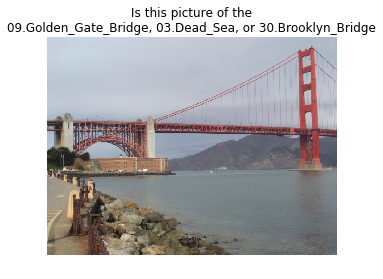

In [13]:
def suggest_locations(img_path):
    # get landmark predictions
    predicted_landmarks = predict_landmarks(img_path, 3)
    
    ## TODO: display image and display landmark predictions
    top_k_predictions = predict_landmarks(img_path, 3)
    
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title('Is this picture of the\n{}, {}, or {}'.format(top_k_predictions[0], top_k_predictions[1], top_k_predictions[2]))
    plt.axis('off')
    plt.show()
    

# test on a sample image
suggest_locations('images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg')

### (IMPLEMENTATION) Test Your Algorithm

Test your algorithm by running the `suggest_locations` function on at least four images on your computer. Feel free to use any images you like.

__Question 4:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

The output is better than I expected from only training 20 epoch.

1- I trained the model for only 20 epoch due to limited time; thus more training time will give me better results.

2- If I were to plan for longer training times I would definitely work more on the agumentation of the dataset, through fine tunning the values entered to the tranformations.

3- If i were to train for longer training time I would have gone for a deeper model with better overfitting measures in place to distinguish and recognize more objects

In [18]:
## TODO: Execute the `suggest_locations` function on
## at least 4 images on your computer.
## Feel free to use as many code cells as needed.

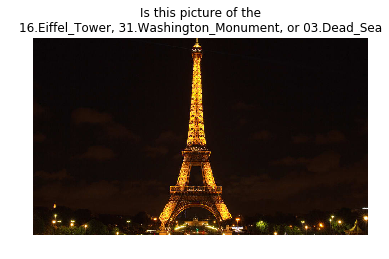

In [14]:
suggest_locations('Testing suggest locations/Eiffel_Tower.jpg')

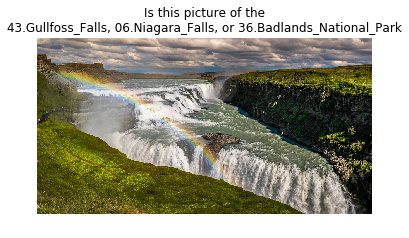

In [15]:
suggest_locations('Testing suggest locations/gullfoss-waterfall.jpg')

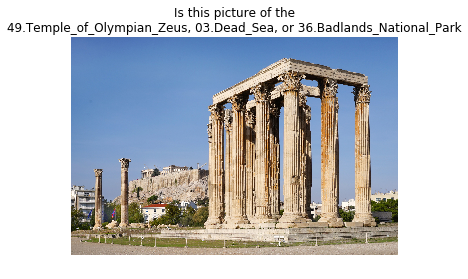

In [16]:
suggest_locations('Testing suggest locations/Temple_of_Olympian_Zeus.jpg')

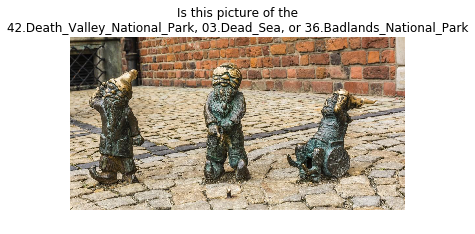

In [17]:
suggest_locations('Testing suggest locations/Wroclaws_Dwarves.jpg')